# Laboratorio 9
## Visualizacion de datos

### Integrantes:
* Andres de la Roca
* Jun Woo Lee

In [140]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls
import plotly.io as pio

In [141]:
df_emissions = pd.read_csv("emissions.csv") # Data de emisiones

En este dataset se encuentran el total de emisiones de gases de invernadero que emite cada nacion debido a los sistemas de alimentos, estos incluyen pero no se limitan a: la agricultura, cambio del uso de la tierra y emisiones relacionadas a la cadena de suministro de alimentos. Las emisiones se cuantifican en cuanto a la produccion total de alimentos.

## Exploracion de datos y Analisis

In [142]:
# Limpiar/Normalizar datos y columnas
df_emissions = df_emissions.dropna()
df_emissions = df_emissions.drop(columns=['Code']) # Eliminar columna Code
df_emissions = df_emissions.rename(columns={'Entity':'Country',"Food's share of total emissions (incl. LULUFC)":'Emissions'})

Durante esta limpieza de datos se normalizaran los nombres de las columnas y se eliminara la columna de "Code" ya que no es necesaria para el analisis.

In [143]:
Q1 = df_emissions['Emissions'].quantile(0.25)
Q3 = df_emissions['Emissions'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_emissions['Emissions'] = df_emissions['Emissions'].clip(lower_bound, upper_bound)

Adicionalmente, se eliminaran los datos atipicos de la columna de "Emissions" ya que estos no son representativos de la mayoria de los datos y llegan a producir ruido en el analisis.

In [144]:
# Remove negative values
df_emissions = df_emissions[df_emissions['Emissions'] > 0]

Se eliminan los valores negativos de las emisiones, principalmente porque la existencia de los valores de emisiones negativas dentro del contexto de este analisis es poco problable (Al punto que se le puede considerar un) y por lo tanto llega a producir ruido en el analisis. H. Ritchie, P. Rosado, M. Roser, (2022)

In [145]:
df_emissions

,Country,Year,Emissions
0,Afghanistan,1990,78.558522
1,Afghanistan,1991,79.335651
2,Afghanistan,1992,84.268804
3,Afghanistan,1993,85.247941
4,Afghanistan,1994,86.897834
...,...,...,...
5767,Zimbabwe,2011,80.391380
5768,Zimbabwe,2012,79.733619
5769,Zimbabwe,2013,79.451646
5770,Zimbabwe,2014,78.125762


In [146]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5526 entries, 0 to 5771
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    5526 non-null   object 
 1   Year       5526 non-null   int64  
 2   Emissions  5526 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 172.7+ KB


Text(0.5, 1.0, 'Distribution of Emissions')

<Figure size 1200x800 with 0 Axes>

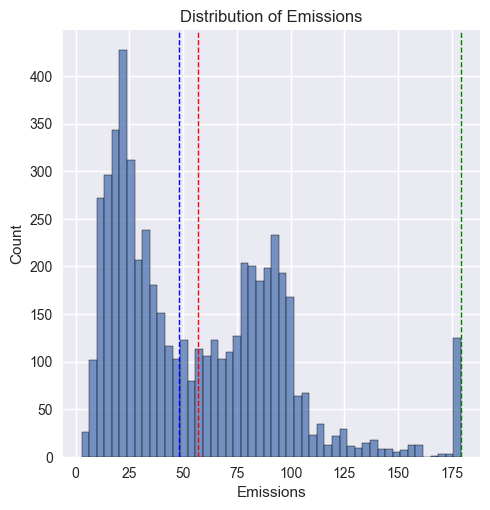

In [147]:
plt.figure(figsize=(12,8))
sns.displot(df_emissions['Emissions'], bins=50)

plt.axvline(df_emissions['Emissions'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_emissions['Emissions'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_emissions['Emissions'].mode()[0], color='g', linestyle='dashed', linewidth=1)
plt.title('Distribution of Emissions')

A partir de este analisis de distribucion de las emisiones en general en todo el mundo se puede observar que la mayoria de los paises se encuentran en el rango de 0 a 100 emisiones de paises, con una media de aproximadamente de valor 55, mientras que, hay algunos valores registrados entre 100 y 180 estos mas que nada representan los valores mas grandes (sin volverse atipicos) que se han registrado de emisiones.

In [148]:
df_emissions['Emissions'].describe()

count    5526.000000
mean       56.787950
std        38.616920
min         2.775523
25%        23.066309
50%        48.315690
75%        85.630357
max       179.181261
Name: Emissions, dtype: float64

In [149]:
fig = px.line(df_emissions, x="Year", y="Emissions", color='Country', title='Food Emissions by Country')

fig.for_each_trace(lambda t: t.update(visible=False) if t.name != 'China' and t.name != 'United States' and t.name != 'India' and t.name != 'Indonesia' and t.name != 'Pakistan'  and t.name != 'Guatemala' else ())
fig.update_traces(mode='lines+markers')
fig.for_each_trace(lambda t: t.update(line_color='red') if t.name == 'China' else ())
fig.for_each_trace(lambda t: t.update(line_color='blue') if t.name == 'United States' else ())
fig.for_each_trace(lambda t: t.update(line_color='green') if t.name == 'India' else ())
fig.for_each_trace(lambda t: t.update(line_color='orange') if t.name == 'Indonesia' else ())
fig.for_each_trace(lambda t: t.update(line_color='purple') if t.name == 'Pakistan' else ())
fig.for_each_trace(lambda t: t.update(line_color='skyblue') if t.name == 'Guatemala' else ())


fig.show()


In [150]:
# Calculate the 5 countries with the highest average emissions
df_emissions.groupby('Country')['Emissions'].mean().sort_values(ascending=False).head(5)

Country
Fiji                 156.826052
Uruguay              154.557693
Niue                 149.773596
Wallis and Futuna    143.528004
Tuvalu               126.025205
Name: Emissions, dtype: float64

In [151]:
# Plot the 5 countries with the highest average emissions
fig = px.line(df_emissions, x="Year", y="Emissions", color='Country', title='Food Emissions by Country')

fig.for_each_trace(lambda t: t.update(visible=False) if t.name != 'Fiji' and t.name != 'Uruguay' and t.name != 'Niue' and t.name != 'Wallis and Futuna' and t.name != 'Tuvalu' else ())
fig.update_traces(mode='lines+markers')
fig.for_each_trace(lambda t: t.update(line_color='red') if t.name == 'Fiji' else ())
fig.for_each_trace(lambda t: t.update(line_color='blue') if t.name == 'Uruguay' else ())
fig.for_each_trace(lambda t: t.update(line_color='green') if t.name == 'Niue' else ())
fig.for_each_trace(lambda t: t.update(line_color='orange') if t.name == 'Wallis and Futuna' else ())
fig.for_each_trace(lambda t: t.update(line_color='purple') if t.name == 'Tuvalu' else ())
fig.show()

In [152]:
# Calculate the 5 countries with the lowest average emissions
df_emissions.groupby('Country')['Emissions'].mean().sort_values(ascending=True).head(5)

Country
French Guiana               5.458567
United Arab Emirates        8.816717
Singapore                   9.175509
Turks and Caicos Islands    9.318669
Palau                       9.410912
Name: Emissions, dtype: float64

In [153]:
# Plot the 5 countries with the lowest average emissions
fig = px.line(df_emissions, x="Year", y="Emissions", color='Country', title='Food Emissions by Country')

fig.for_each_trace(lambda t: t.update(visible=False) if t.name != 'French Guiana' and t.name != 'United Arab Emirates' and t.name != 'Singapore' and t.name != 'Turks and Caicos Islands' and t.name != 'Palau' else ())
fig.update_traces(mode='lines+markers')
fig.for_each_trace(lambda t: t.update(line_color='red') if t.name == 'French Guiana' else ())
fig.for_each_trace(lambda t: t.update(line_color='blue') if t.name == 'United Arab Emirates' else ())
fig.for_each_trace(lambda t: t.update(line_color='green') if t.name == 'Singapore' else ())
fig.for_each_trace(lambda t: t.update(line_color='orange') if t.name == 'Turks and Caicos Islands' else ())
fig.for_each_trace(lambda t: t.update(line_color='purple') if t.name == 'Palau' else ())
fig.show()

In [154]:
# Plot emissions worldwide through a choropleth map
fig = px.choropleth(df_emissions, locations="Country", locationmode='country names', color="Emissions", hover_name="Country", title='Food Emissions by Country')
fig.show()


In [155]:
# Plot Guatemalan emissions through a line graph
df_emissions_guatemala = df_emissions[df_emissions['Country'] == 'Guatemala']
fig = px.line(df_emissions_guatemala, x="Year", y="Emissions", color='Country', title='Food Emissions by Country')
fig.update_traces(mode='lines+markers')
fig.for_each_trace(lambda t: t.update(line_color='skyblue') if t.name == 'Guatemala' else ())
fig.show()

In [156]:
# Plot central american emissions through a line graph
df_emissions_central_america = df_emissions[df_emissions['Country'].isin(['Guatemala','El Salvador','Honduras','Nicaragua','Costa Rica','Panama'])]
fig = px.line(df_emissions_central_america, x="Year", y="Emissions", color='Country', title='Food Emissions by Country')
fig.update_traces(mode='lines+markers')
# Color Guatemala sky blue
fig.for_each_trace(lambda t: t.update(line_color='skyblue') if t.name == 'Guatemala' else ())

fig.show()

In [157]:
# Plot emissions of Guatemala and Latin American Countries through a line graph
df_emissions_latin_america = df_emissions[df_emissions['Country'].isin(['Guatemala','Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Uruguay','Venezuela', 'Mexico'])]
fig = px.line(df_emissions_latin_america, x="Year", y="Emissions", color='Country', title='Food Emissions by Country')
fig.update_traces(mode='lines+markers')
# Color Guatemala sky blue
fig.for_each_trace(lambda t: t.update(line_color='skyblue') if t.name == 'Guatemala' else ())

## Referencias

H. Ritchie, P. Rosado and M. Roser (2022) - "Environmental Impacts of Food Production OurWorldInData.org. Extraido de: 'https://ourworldindata.org/environmental-impacts-of-food' [Online Resource]